# Assignment 10

## Data Analytics III

### Problem Statement

1. Implement Simple Naive Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

### Step 1 - Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 - Importing Dataset

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

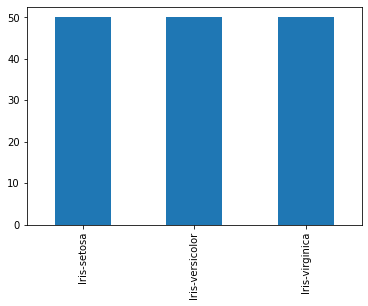

In [7]:
data['Species'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

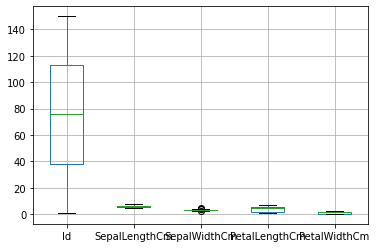

In [8]:
data.boxplot()

In [9]:
# Splitting into independent and dependent variables
X = data.iloc[:,:4].values
y = data['Species'].values

In [10]:
X

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

### Step 3 - Splitting into Train and Test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train

array([[ 23. ,   4.6,   3.6,   1. ],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 66. ,   6.7,   3.1,   4.4],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 43. ,   4.4,   3.2,   1.3],
       [147. ,   6.3,   2.5,   5. ],
       [ 52. ,   6.4,   3.2,   4.5],
       [ 28. ,   5.2,   3.5,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [ 33. ,   5.2,   4.1,   1.5],
       [143. ,   5.8,   2.7,   5.1],
       [ 86. ,   6. ,   3.4,   4.5],
       [ 87. ,   6.7,   3.1,   4.7],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 82. ,   5.5,   2.4,   3.7],
       [134. ,   6.3,   2.8,   5.1],
       [138. ,   6.4,   3.1,   5.5],
       [ 76. ,   6.6,   3. ,   4.4],
       [110. ,   7.2,   3.6,   6.1],
       [ 97. ,   5.7,   2.9,   4.2],
       [106. ,   7.6,   3. ,   6.6],
       [ 67. ,   5.6,   3. ,   4.5],
       [  1. ,   5.1,   3.5,   1.4],
       [123. ,   7.7,   2.8,   6.7],
       [ 68. ,   5.8,   2.7,   4.1],
       [ 29. ,   5.2,   3.4,   1.4],
 

### Step 4 - Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[-1.21030717, -1.47393679,  1.22037928, -1.5639872 ],
       [-1.37240188, -0.13307079,  3.02001693, -1.27728011],
       [-0.21458252,  1.08589829,  0.09560575,  0.38562104],
       [-1.46502743, -1.23014297,  0.77046987, -1.21993869],
       [-0.74717943, -1.7177306 ,  0.32056046, -1.39196294],
       [ 1.66108484,  0.59831066, -1.25412249,  0.72966956],
       [-0.53877194,  0.72020757,  0.32056046,  0.44296246],
       [-1.09452523, -0.74255534,  0.99542457, -1.27728011],
       [-1.62712214, -0.98634915,  1.22037928, -1.33462153],
       [-0.9787433 , -0.74255534,  2.34515281, -1.27728011],
       [ 1.56845929, -0.01117388, -0.80421307,  0.78701097],
       [ 0.24854522,  0.23261993,  0.77046987,  0.44296246],
       [ 0.27170161,  1.08589829,  0.09560575,  0.5576453 ],
       [-1.34924549, -0.49876152,  1.8952434 , -1.39196294],
       [-1.48818382, -0.49876152,  1.44533399, -1.27728011],
       [ 0.15591967, -0.37686461, -1.47907719, -0.01576889],
       [ 1.36005181,  0.

### Step 5 - Training the Naive Bayes Classification model on the Training Set

In [15]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Step 6 - Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

### Step 7 - Confusion Matrix and Accuracy

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

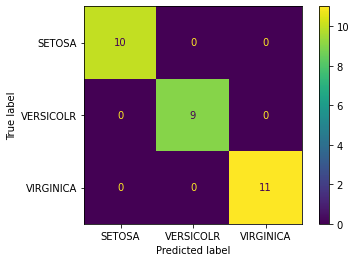

In [18]:
labels = ['SETOSA','VERSICOLR','VIRGINICA']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
plt.show()

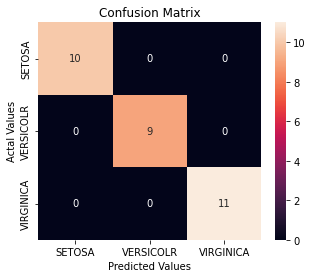

In [19]:
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print ("Accuracy : ", accuracy_score(y_test, y_pred))

print("Error rate : ", 1 - accuracy_score(y_test, y_pred))

print("Precision : ", precision_score(y_test, y_pred, average = 'macro'))

print("Recall : ", recall_score(y_test, y_pred, average = 'macro'))

print("F1 Score : ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy :  1.0
Error rate :  0.0
Precision :  1.0
Recall :  1.0
F1 Score :  1.0


### Step 8 - Comparing the Real Values with Predicted Values

In [21]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [23]:
TP_0 = cm[0,0]
TP_1 = cm[1,1]
TP_2 = cm[2,2]
FN_0 = cm[0,1] + cm[0,2]
FN_1 = cm[1,0] + cm[1,2]
FN_2 = cm[2,0] + cm[2,1]
FP_0 = cm[1,0] + cm[2,0]
FP_1 = cm[0,1] + cm[2,1]
FP_2 = cm[0,2] + cm[1,2]
TN_0 = cm[1,1] + cm[2,1] + cm[2,2] + cm[1,2]
TN_1 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
TN_2 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]

In [24]:
print('True positives for SETOSA, VERSICOLR, VIRGINICA:', TP_0, TP_1, TP_2)

True positives for SETOSA, VERSICOLR, VIRGINICA: 10 9 11


In [25]:
acc1 = (TP_0+TN_0)/(TP_0+TN_0+FP_0+FN_0)
print("Acc of SETOSA ", acc1)

acc2 = (TP_1+TN_1)/(TP_1+TN_1+FP_1+FN_1)
print("Acc of VERSICOLR ", acc2)

acc3 = (TP_2+TN_2)/(TP_2+TN_2+FP_2+FN_2)
print("Acc of VIRGINICA ", acc3)

avg_acc = (acc1 + acc2 + acc3)/3
print("Average accuracy:", avg_acc)

Acc of SETOSA  1.0
Acc of VERSICOLR  1.0
Acc of VIRGINICA  1.0
Average accuracy: 1.0


In [26]:
prec1 = (TP_0)/(TP_0+FP_0)
print("Precision of SETOSA ", prec1)

prec2 = (TP_1)/(TP_1+FP_1)
print("Precision of VERSICOLR ", prec2)

prec3 = (TP_2)/(TP_2+FP_2)
print("Precision of VIRGINICA ", prec3)

Precision of SETOSA  1.0
Precision of VERSICOLR  1.0
Precision of VIRGINICA  1.0


In [27]:
rec1 = (TP_0)/(TP_0+FN_0)
print("Recall of SETOSA ", rec1)

rec2 = (TP_1)/(TP_1+FN_1)
print("Recall of VERSICOLR ", rec2)

rec3 = (TP_2)/(TP_2+FN_2)
print("Recall of VIRGINICA ", rec3)

Recall of SETOSA  1.0
Recall of VERSICOLR  1.0
Recall of VIRGINICA  1.0


In [28]:
f1score1 = 2*rec1*prec1/(rec1+prec1)
print("Recall of SETOSA ", f1score1)

f1score2 = 2*rec2*prec2/(rec2+prec2)
print("Recall of VERSICOLR ", f1score2)

f1score3 = 2*rec3*prec3/(rec3+prec3)
print("Recall of VIRGINICA ", f1score3)

Recall of SETOSA  1.0
Recall of VERSICOLR  1.0
Recall of VIRGINICA  1.0


In [29]:
TP = TP_0+TP_1+TP_2
TN = TN_0+TN_1+TN_2
FP = FP_0+FP_1+FP_2
FN = FN_0+FN_1+FN_2
print("TP TN FP FN", TP,TN,FP,FN)

TP TN FP FN 30 60 0 0


In [30]:
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(accuracy)

1.0


In [31]:
precision = TP/(TP+FP)
print("Precision: ", precision)

Precision:  1.0


In [32]:
recall = TP /(TP+FN)
print("Recall: ",recall)

Recall:  1.0


In [33]:
error_rate = (FP+FN)/(TP+TN+FP+FN)
print("Error rate = ", error_rate)

Error rate =  0.0


In [34]:
# Specificity (True negative rate)
true_neg_rate = TN/(TN+FP)
false_pos_rate = FP/(TN+FP)
print("Specificity or true negative rate : ",true_neg_rate)
print("False positive rate : ",false_pos_rate)

Specificity or true negative rate :  1.0
False positive rate :  0.0


In [35]:
f1score = 2*(precision*recall)/(precision+recall)
print("F1-score: ",f1score)

F1-score:  1.0
